- dataset name = coco dataset
- version      = yolo v3 
- yolo version 3 search paper = https://arxiv.org/pdf/1804.02767.pdf
- website      = https://pjreddie.com/darknet/yolo/
- coco dataset website = https://cocodataset.org/
- coco dataset research paper = https://arxiv.org/pdf/1405.0312.pdf


In [1]:
import cv2 
import numpy as np 


In [2]:
image = cv2.imread('./testing images/2.jpeg')

In [3]:
print(image)  # pixel intensity in an image 


[[[152 170 171]
  [140 158 159]
  [147 165 166]
  ...
  [ 67  75  75]
  [ 67  75  75]
  [ 67  75  75]]

 [[129 149 150]
  [145 165 166]
  [164 184 185]
  ...
  [ 67  75  75]
  [ 67  75  75]
  [ 67  75  75]]

 [[ 94 115 116]
  [142 163 164]
  [171 192 193]
  ...
  [ 66  74  74]
  [ 66  74  74]
  [ 66  74  74]]

 ...

 [[ 52  50  49]
  [ 52  50  49]
  [ 52  50  49]
  ...
  [ 47  55  54]
  [ 48  56  55]
  [ 49  57  56]]

 [[ 52  50  49]
  [ 52  50  49]
  [ 52  50  49]
  ...
  [ 56  64  63]
  [ 57  65  64]
  [ 58  66  65]]

 [[ 53  51  50]
  [ 53  51  50]
  [ 53  51  50]
  ...
  [ 62  70  69]
  [ 62  70  69]
  [ 62  70  69]]]


In [4]:
# finding the shape of an image 

image.shape  # first parameter for height , width and channels 

(630, 1200, 3)

In [5]:
# finding whether its working fine or not 

cv2.imshow('car',image)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# total 80 on coco dataset (90) extra 10 recently added so total 90 classes 

classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())

In [7]:
len(classes_names)

91

In [8]:
classes = ['car','person','bus']

In [9]:
original_with , original_height = image.shape[1] , image.shape[0]


In [10]:
original_with , original_height

(1200, 630)

In [11]:
# Loading cfg file and weights file which are already trained on cooc dataset. 

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')


In [12]:
Neural_Network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
Neural_Network.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [13]:
blob = cv2.dnn.blobFromImage(image,1/255,(320,320),True , crop = False)

In [14]:
blob.shape

(1, 3, 320, 320)

In [15]:
## Getting layer Names 

layers = Neural_Network.getLayerNames()
layers

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [16]:
layer_names = Neural_Network.getUnconnectedOutLayersNames()
layer_names

('yolo_82', 'yolo_94', 'yolo_106')

In [17]:
layer_index = Neural_Network.getUnconnectedOutLayers()
layer_index

array([200, 227, 254])

In [18]:
layer_index = [layers[j-1] for j in Neural_Network.getUnconnectedOutLayers()]

# since index of any os starts with 0 but this layers count start with 1 

In [19]:
layer_index

['yolo_82', 'yolo_94', 'yolo_106']

In [20]:
Neural_Network.setInput(blob)  # input for network 

In [21]:
outputs = Neural_Network.forward(layer_index)  # giving data to last 3 yolo layers 

# each layer predicts its bounding boxes 

In [22]:
outputs

(array([[0.0509447 , 0.06593435, 0.56866026, ..., 0.        , 0.        ,
         0.        ],
        [0.055107  , 0.04567229, 0.3865019 , ..., 0.        , 0.        ,
         0.        ],
        [0.05927899, 0.05249881, 1.0590143 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.93125075, 0.92865384, 0.4147179 , ..., 0.        , 0.        ,
         0.        ],
        [0.9486451 , 0.9460265 , 0.37472966, ..., 0.        , 0.        ,
         0.        ],
        [0.95890856, 0.9517094 , 0.99258935, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02617279, 0.03007394, 0.06441526, ..., 0.        , 0.        ,
         0.        ],
        [0.01897426, 0.02230983, 0.4773849 , ..., 0.        , 0.        ,
         0.        ],
        [0.02859797, 0.02188537, 0.09563092, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.96498716, 0.9622611 , 0.06825644, ..., 0.        , 0.        ,
         0.        

In [23]:
outputs[0].shape # 300 bounding boxes in first box and 85 predcitions in each box 

(300, 85)

In [24]:
# 5-> (x,y,h,w,confidence) + 80 labels in coco dataset 

In [25]:
outputs[1].shape  # this is in second output layer 

(1200, 85)

In [26]:
outputs[2].shape  # this is in third output layer 

(4800, 85)

In [38]:
Threshold = 0.3
image_size = 320


def finding_locations(outputs):
    
    bounding_box_locations = []
    class_ids = []
    confidence = []   

    for i in outputs:
        for j in i:
            class_prob = j[5:]                     # finding prob values for all classes 
            class_ids1 = np.argmax(class_prob)      # selecting highest one 
            confidence_value = class_prob[class_ids1]     # selecting its confidence value 
            
            if confidence_value > Threshold:
                # finding w and h 
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
               # print(w , h)
                # finding x and y
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h / 2)
                bounding_box_locations.append([x,y,w,h])
                class_ids.append(class_ids1)
                confidence.append(float(confidence_value))
                
    
    indeces = cv2.dnn.NMSBoxes(bounding_box_locations,confidence,Threshold,0.5)
    return indeces,bounding_box_locations,confidence,class_ids

    
    

In [39]:
predicted_box , bounding_box , conf , classes = finding_locations(outputs)

In [29]:
predicted_box

array([ 3,  7, 30, 19, 27, 31,  6, 24, 15, 16])

In [30]:
bounding_box

[[3, 94, 170, 189],
 [3, 94, 202, 185],
 [2, 106, 170, 190],
 [-5, 104, 217, 196],
 [2, 124, 169, 209],
 [283, 91, 35, 55],
 [275, 94, 48, 48],
 [189, 63, 59, 182],
 [198, 67, 55, 172],
 [189, 65, 57, 198],
 [185, 56, 64, 249],
 [57, 66, 34, 25],
 [88, 69, 19, 20],
 [85, 68, 25, 21],
 [110, 71, 17, 16],
 [112, 71, 18, 16],
 [47, 70, 42, 22],
 [56, 68, 36, 24],
 [79, 70, 27, 21],
 [88, 70, 19, 20],
 [86, 70, 23, 21],
 [115, 72, 14, 17],
 [112, 72, 17, 16],
 [111, 72, 24, 16],
 [125, 72, 17, 18],
 [128, 71, 18, 21],
 [125, 71, 25, 20],
 [144, 71, 27, 21],
 [155, 71, 35, 21],
 [168, 72, 22, 20],
 [166, 71, 25, 22],
 [298, 97, 10, 49],
 [299, 98, 13, 48]]

In [31]:
conf

[0.7909920811653137,
 0.8052532076835632,
 0.9822667837142944,
 0.984060525894165,
 0.32639047503471375,
 0.5672412514686584,
 0.6883158087730408,
 0.9754999876022339,
 0.435348242521286,
 0.9544636607170105,
 0.4536289572715759,
 0.39682650566101074,
 0.39440226554870605,
 0.33185911178588867,
 0.33040279150009155,
 0.6392247080802917,
 0.4781317710876465,
 0.4517751634120941,
 0.35493895411491394,
 0.7748555541038513,
 0.5579373240470886,
 0.34666121006011963,
 0.5698261857032776,
 0.3429315984249115,
 0.6392292380332947,
 0.47994115948677063,
 0.5971044301986694,
 0.7451826333999634,
 0.46423637866973877,
 0.6395021080970764,
 0.9369831681251526,
 0.7172856330871582,
 0.34681734442710876]

In [71]:
classes[0]

2

In [33]:
font = cv2.FONT_HERSHEY_COMPLEX
height_ratio = original_height / 320
width_ration = original_with / 320

In [34]:
import matplotlib.pyplot as plt 

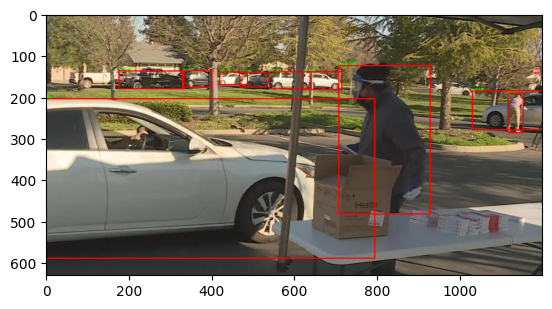

In [35]:
for j in predicted_box.flatten():
    
    x, y , w , h = bounding_box[j]
    x = int(x * width_ration)
    y = int(y * height_ratio)
    w = int(w * width_ration)
    h = int(h * height_ratio)
    
    label = str(classes_names[classes[j]])
    conf_ = str(round(conf[j],2))
    cv2.rectangle(image , (x,y) , (x+w , y+h) , (0,0,255) , 2)
    cv2.putText(image , label+' '+conf_ , (x , y-2) , font , .2 , (0,255,0),1)

#cv2.imshow('Yolo image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
plt.imshow(image[:,:,::-1])

In [44]:
## comlete code 

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.5
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    for k in predicted_box.flatten():
        x , y , w , h = bounding_box[k]
        x = int(x * width_ratio)
        y = int(y * height_ratio)
        w = int(w * width_ratio)
        h = int(h * height_ratio)
        conf_level = str(round(confidence[k] , 2))
        label = str(classes_names[class_labels[k]])
        cv2.rectangle(image , (x,y),(x+w , y+h),(0,0,255),2)
        cv2.putText(image ,label+' '+conf_level,(x,y-2),font,1,(255,0,0,),2)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .6)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels





image = cv2.imread('./testing images/2.jpeg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_with , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)
prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)

final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )

In [96]:
cv2.imshow('prediction ',image)
cv2.waitKey()
cv2.destroyAllWindows()